In [181]:
import glob
import cv2
import skimage

import skimage.io as io
import numpy as np
import commonfunctions as cf
from skimage.feature import hog
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn import metrics
import pickle

In [182]:
loaded_model = pickle.load(open('car_detect_model2.sav', 'rb'))


/home/mohamed/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [183]:
def extract_hog(images):
    images_hog_features = []
    for image in images:
        hog_features= hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None)
        images_hog_features.append(hog_features)
    return images_hog_features

In [184]:
img_original=io.imread('car3.png')
# img_original = cv2.imread('modeltest1.png', -1) 
# img = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_original = resize(img_original, 
                     (64, 64),
                    anti_aliasing=True)
print(img_original.shape)
# io.imshow(img)
# print(img.shape)


(64, 64, 4)


/home/mohamed/.local/lib/python3.8/site-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


(2916,)


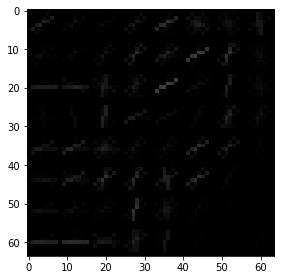

In [185]:
# lis=[]
# lis.append(img)
# print(img.shape)
#img_gray=cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
#gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
hog_features,hog_img= hog(img_original, orientations=9,
 pixels_per_cell=(8, 8),
  cells_per_block=(3, 3), block_norm='L2-Hys', 
  visualize=True, transform_sqrt=False,
   feature_vector=True, multichannel=True)
#print(hog_features)
io.imshow(hog_img)
print(hog_features.shape)
#imgList=extract_hog(np.array(lis))


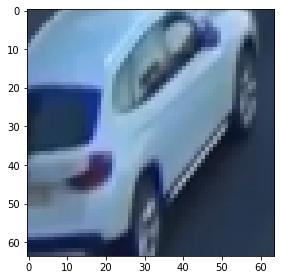

In [189]:
io.imshow(img_original)

In [187]:
X_test=[]
X_test.append(hog_features)
# Y_test=[True]
# result = loaded_model.score(X_test, Y_test)


In [188]:
print(np.uint8(loaded_model.predict(X_test)[0]))

0


(136, 241, 4)


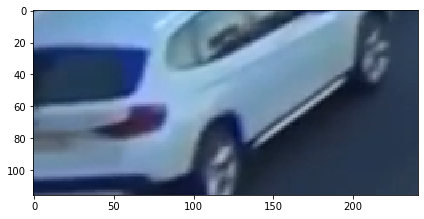

In [196]:
img_original=io.imread('car3.png')

n=np.array(img_original)
print(n.shape)
io.imshow(n[20:136,:,:])